In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
%matplotlib inline

In [10]:
R_earth = 6.371e6 # Earth Mean rad, in m
g_0 = 9.80665 # earth standard gravity, in m/s**2

def alt(x,y): #altitude above sea level
    return np.sqrt(x**2+y**2) - R_earth

def lon(x,y): # 2D from north pole down, @equator
    return np.arctan2(y,x)

def grav(x,y):
    assert alt(x,y) >= 0, 'must be @ or above sea level'
    h = alt(x,y)
    phi=lon(x,y)
    #print phi
    g_h = g_0*(R_earth/(R_earth+h))**2
    
    return np.array([g_h*np.cos(phi), g_h*np.sin(phi)])

    
mag = lambda x: np.sqrt(x.dot(x))
print grav(0., R_earth)

[  6.00484127e-16   9.80665000e+00]


In [536]:
def T_w(t,g): #thrust:weight ratio
        
        Isp = 304  # sec
        v_e = g*Isp
        # dV = 4550  # m/s for kerbin low orbit
        
        #F = 18900000. #N
        
        m0 = 130000. #kg
        #mf0 = 2160000 #kg
        #mf0 = 2502017*.842757999839# kg tsiolovsky
        mf0 = 2502017*.845
        dmf = 13000.
        
        F = dmf*v_e
        
        m_t = m0 + (mf0-dmf*t)
        #dmf = 80. #kg/s
        
        if (m_t<=m0): # or (t>405):
            F=0.
            m_t=m0
        
        #m_t = m0 + (mf0-dmf*t)
        print 'total mass--',m_t
        
        print 'T:W ratio--',F/(m_t*g)
        return F/(m_t*g)

$${dv\over dt}=-\frac{GM}{r^2}\sin\gamma-\frac{D}{m}$$
$${d\gamma\over dt}={1\over r}{\left(v-\frac{GM }{r v}\right)\cos\gamma}+\frac{L}{m v}$$
$${dr\over dt}=v\sin\gamma$$
$${d\phi\over dt}=\frac{v}{r}\cos\gamma$$

In [537]:
G = 6.672e-11 # Gravitational Constant
M = 5.97219e24 # Mass of Earth 
#M = 5.2915793e22 #Mass of Kerbin
#R = 6e5 #Radius of Kerbin
R= 6.378e6 # mean Radius of Earth

def g(y,t):
    
    V_i = y[0]
    gam_i=y[1]
    r_i = y[2]
    phi_i = y[3]
    
    assert r_i>=R, 'You have crashed'
    g = G*M/r_i**2
    
    
    f_v = -g*(np.sin(gam_i) - T_w(t,g))
    f_gam=(V_i/r_i - g/V_i)*np.cos(gam_i) # + drag/ ortho. term 
    f_r = V_i*np.sin(gam_i)
    f_phi = (V_i/r_i)*np.cos(gam_i)
    print 'time--',t
    #print gam_i
    return [f_v, f_gam, f_r, f_phi]

V0=  50 #6.1e2
gam0=np.pi/2.-0.1
r_0 = R+ 2.86875e2
phi0 = -1.5
g0=[V0, gam0, r_0, phi0]
t=np.linspace(0,7000,10000)

soln=odeint(g, g0, t) #[]

total mass-- 2244204.365
T:W ratio-- 1.7609804444
time-- 0.0
total mass-- 2244203.25989
T:W ratio-- 1.76098131155
time-- 8.50082816557e-05
total mass-- 2244203.25989
T:W ratio-- 1.76098131155
time-- 8.50082816557e-05
total mass-- 2244202.15478
T:W ratio-- 1.76098217871
time-- 0.000170016563311
total mass-- 2244202.15478
T:W ratio-- 1.76098217871
time-- 0.000170016563311
total mass-- 2243118.91344
T:W ratio-- 1.7618325878
time-- 0.0834962739797
total mass-- 2243118.91344
T:W ratio-- 1.7618325878
time-- 0.0834962739797
total mass-- 2242035.67209
T:W ratio-- 1.76268381864
time-- 0.166822531396
total mass-- 2242035.67209
T:W ratio-- 1.76268381864
time-- 0.166822531396
total mass-- 2240952.43075
T:W ratio-- 1.76353587242
time-- 0.250148788812
total mass-- 2240952.43075
T:W ratio-- 1.76353587242
time-- 0.250148788812
total mass-- 2236934.88904
T:W ratio-- 1.76670318808
time-- 0.55919045812
total mass-- 2236934.88904
T:W ratio-- 1.76670318808
time-- 0.55919045812
total mass-- 2237800.7006
T:W

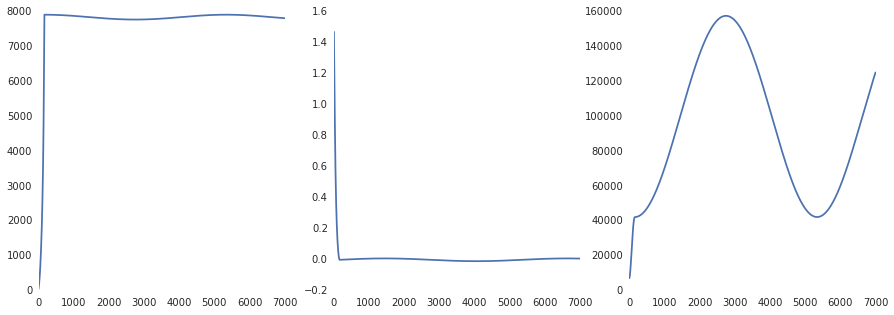

In [538]:
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i,n in enumerate(ax.flatten()[:2]):
    n.plot(t,soln[:,i])
ax.flatten()[-1].plot(t,soln[:,2]-R_earth)

(10000.0, 9000000.0)

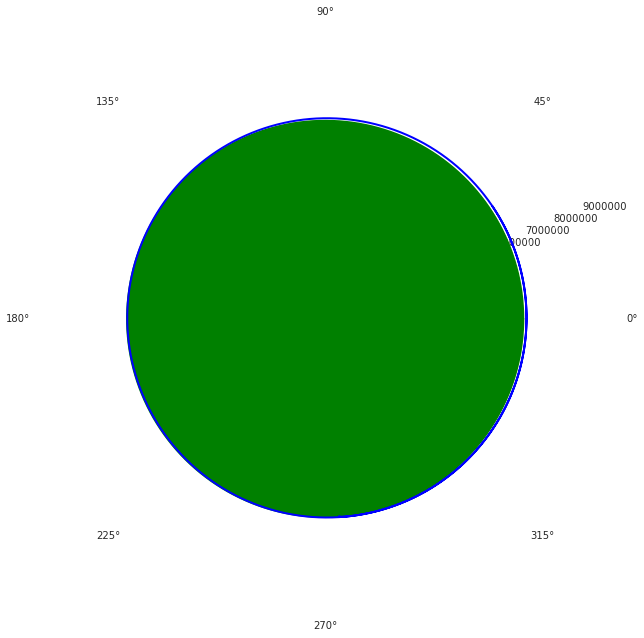

In [526]:
fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot(111, polar=True) 

ax1.plot(np.linspace(0,2*np.pi, 10000),R*np.ones(10000), linewidth=3, color='g')
ax1.fill_betweenx(R*np.ones(10000), np.linspace(0,2*np.pi, 10000), color='g')
ax1.plot(soln[:,3], soln[:,2], linewidth=2, color='b')
ax1.set_ylim(1e4,9e6)

In [527]:
soln[:,2]

array([ 6378286.875     ,  6378323.52320005,  6378363.82475682, ...,
        6508127.49972794,  6508124.45359044,  6508121.36088287])

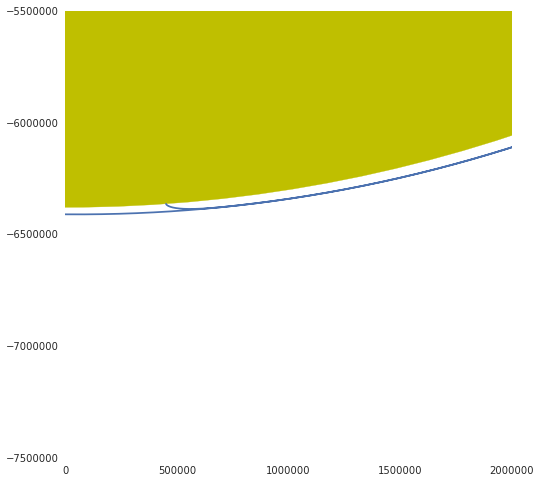

In [528]:
circle1=plt.Circle((0,0),R,color='y')

x=np.multiply(soln[:,2], np.cos(soln[:,3]))
y=np.multiply(soln[:,2], np.sin(soln[:,3]))
plt.plot(x, y)
plt.xlim(0e5,2e6)
plt.ylim(-7.5e6, -5.5e6)
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.gca().add_artist(circle1)

In [389]:
x=np.array([0,1,1,2])
np.where(x<0)[0].size==0

True